# Notebook to check harmonic content

In [1]:
import os
import numpy as np
import scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from custom_tools import plot_2D_pulse

/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1


In [2]:
def sinfunc(phase, A, p, c):
    
    return A * np.sin(phase*2.0*np.pi + p) + c


def sin2func(phase, A, p, c, A2, p2):

        return A*np.sin(phase*2.0*np.pi + p) + A2*np.sin(phase*4.0*np.pi + p2) + c

In [3]:
def fit2sin(data):
    
    
    counts=data.sum(axis=0)
    
    phase=np.linspace(0,1,np.shape(data)[1]+1)[:-1]

    c0 = 6500
    A0 = 1000
    p0 = 0.15*2.0*np.pi
    A20 = 100
    p20 = 0.01*2.0*np.pi

    guess = [A0, p0,c0, A20, p20]
    popt, pcov = scipy.optimize.curve_fit(sin2func, phase, counts, p0=guess)
    #A, p, c, A2, p2 = popt
    #print(popt)
    
    return popt 

 
def fitsin(data):
    
    
    counts=data.sum(axis=0)
    
    phase=np.linspace(0,1,np.shape(data)[1]+1)[:-1]

    c0 = 6500
    A0 = 1000
    p0 = 0.15*2.0*np.pi
    A20 = 100
    p20 = 0.01*2.0*np.pi

    guess = [A0, p0,c0]
    popt, pcov = scipy.optimize.curve_fit(sinfunc, phase, counts, p0=guess)
    #A, p, c, A2, p2 = popt
    #print(popt)
    
    return popt

In [4]:
atmosphere_type='A'
n_params='5'
this_directory = '/home/bas/Documents/Projects/x-psi/xpsi-bas-fork/AMXPs'
#datastring = this_directory + f'/synthesise_pulse_data/data/{atmosphere_type}{n_params}_synthetic_realisation.dat'  
datastring = this_directory +'/synthesise_pulse_data/data/J1808_synthetic_realisation.dat'  
data = np.loadtxt(datastring, dtype=np.double)

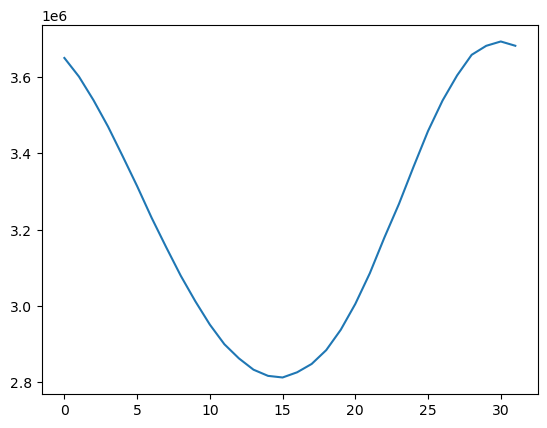

In [5]:
counts=np.sum(data, axis=0)
plt.plot(counts)

In [6]:
A1, p1, c1 = fitsin(data)

In [7]:
phase=np.linspace(0,1,np.shape(data)[1]+1)[:-1]
y=sinfunc(phase, A1, p1, c1)


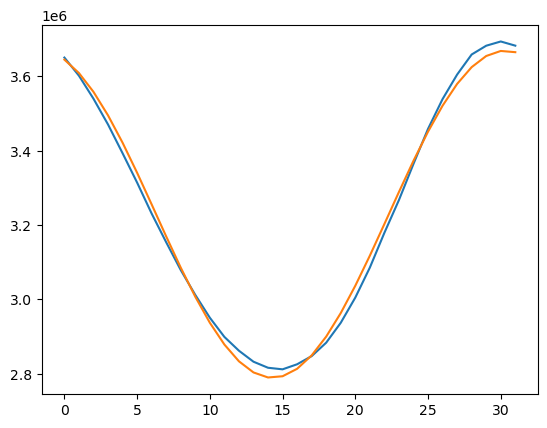

In [8]:
fig, ax = plt.subplots(1,1)
ax.plot(counts)
ax.plot(y)

In [9]:
A, p, c, A2, p2 = fit2sin(data)
y=sinfunc(phase, A, p, c)
y2=sinfunc(phase*2, A2, p2, c)
y3 = sin2func(phase, A, p, c, A2, p2)

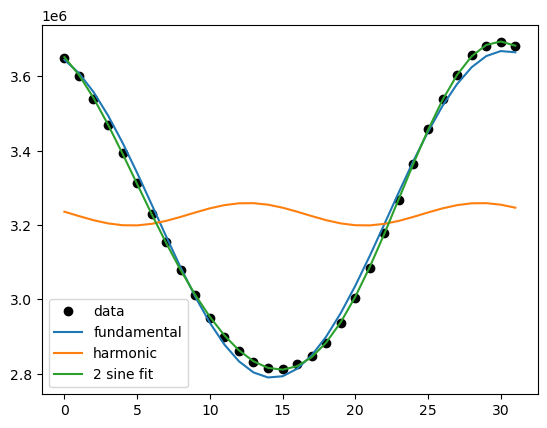

In [10]:
fig, ax = plt.subplots(1,1)
ax.plot(counts, 'ko', label='data')
ax.plot(y, label='fundamental')
ax.plot(y2, label='harmonic')
ax.plot(y3, label='2 sine fit')
ax.legend()

In [12]:
A2/A*100

6.886909585702735